# Coronavirus tweets NLP - Text Classification

#### Perform Text Classification on the data. The tweets have been pulled from Twitter and manual tagging has been done then.

#### The names and usernames have been given codes to avoid any privacy concerns.

#### Columns:

##### 1) Location
##### 2) Tweet At
##### 3) Original Tweet
##### 4) Label

In [1]:
#importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Natural language processing (NLP)\\Sem Preparation\\Coronavirus tweets NLP - Text Classification\\Corona_NLP_train.csv', encoding="latin_1")

In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [6]:
df.shape

(41157, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
#making copy of the original dataframe

In [9]:
df1=df.iloc[:,4:]

In [10]:
df1.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [11]:
#1. Lowercase and Replace

In [12]:
df1['OriginalTweet_new']=df1['OriginalTweet'].str.lower().str.replace('[^a-z\s]','')

In [13]:
df1.head()

,OriginalTweet,Sentiment,OriginalTweet_new
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv httpstcoifzfanpa a...
1,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the covid...


In [14]:
df1['OriginalTweet_new']=df1['OriginalTweet_new'].str.replace('\r','')#removing some extra characters
df1['OriginalTweet_new']=df1['OriginalTweet_new'].str.replace('\n','')#removing some extra characters
df1['OriginalTweet_new']=df1['OriginalTweet_new'].str.replace('https','')#removing some extra characters

In [15]:
#2. Tokenize

In [16]:
df1['OriginalTweet_new']=df1['OriginalTweet_new'].str.split(' ')

In [17]:
df1.head()

,OriginalTweet,Sentiment,OriginalTweet_new
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[menyrbie, philgahan, chrisitv, tcoifzfanpa, a..."
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, to, your, neighbours, family, t..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, to, give,..."
3,My food stock is not the only one which is emp...,Positive,"[my, food, stock, is, not, the, only, one, whi..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[me, ready, to, go, at, supermarket, during, t..."


In [18]:
#3.Remove the stopwords

In [19]:
import nltk

In [20]:
common_stopwords=nltk.corpus.stopwords.words('english')

In [21]:
print(common_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
len(common_stopwords)

179

In [23]:
common_stopwords.remove('no')
common_stopwords.remove('nor')
common_stopwords.remove('not')

In [24]:
def drop_stpowords(text):
    return[word for word in text if word not in common_stopwords]

In [25]:
df1['OriginalTweet_new']=df1['OriginalTweet_new'].apply(drop_stpowords)

In [26]:
df1.head()

,OriginalTweet,Sentiment,OriginalTweet_new
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[menyrbie, philgahan, chrisitv, tcoifzfanpa, t..."
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, not, one, emptyplease, dont, pan..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, go, supermarket, covid, outbreaknot, i..."


In [27]:
# 4. Lemmatization

In [28]:
from nltk.stem.wordnet import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()

In [29]:
def Lemmatization(text):
    return[Lemmatizer.lemmatize(word) for word in text]

In [30]:
df1['OriginalTweet_new']=df1['OriginalTweet_new'].apply(Lemmatization)

In [31]:
df1.head()

,OriginalTweet,Sentiment,OriginalTweet_new
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,"[menyrbie, philgahan, chrisitv, tcoifzfanpa, t..."
1,advice Talk to your neighbours family to excha...,Positive,"[advice, talk, neighbour, family, exchange, ph..."
2,Coronavirus Australia: Woolworths to give elde...,Positive,"[coronavirus, australia, woolworth, give, elde..."
3,My food stock is not the only one which is emp...,Positive,"[food, stock, not, one, emptyplease, dont, pan..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"[ready, go, supermarket, covid, outbreaknot, i..."


In [32]:
# 5 .Cleaning the text

In [33]:
df1['OriginalTweet_new']=df1['OriginalTweet_new'].apply(lambda x: ' '.join(x))

In [34]:
df1.head()

,OriginalTweet,Sentiment,OriginalTweet_new
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv tcoifzfanpa tcoxxg...
1,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworth give elderly d...
3,My food stock is not the only one which is emp...,Positive,food stock not one emptyplease dont panic enou...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid outbreaknot im para...


In [35]:
df2=df1.iloc[:,1:]
df2.head()

,Sentiment,OriginalTweet_new
0,Neutral,menyrbie philgahan chrisitv tcoifzfanpa tcoxxg...
1,Positive,advice talk neighbour family exchange phone nu...
2,Positive,coronavirus australia woolworth give elderly d...
3,Positive,food stock not one emptyplease dont panic enou...
4,Extremely Negative,ready go supermarket covid outbreaknot im para...


In [36]:
df2['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [37]:
#Consider only 3 classes {Positive,Negative,Neutral}

In [38]:
df2['Sentiment']=df2['Sentiment'].replace('Extremely Positive','Positive')
df2['Sentiment']=df2['Sentiment'].replace('Extremely Negative','Negative')

In [39]:
df2['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [40]:
#df2['Sentiment']=df2['Sentiment'].replace('Positive',1)
#df2['Sentiment']=df2['Sentiment'].replace('Negative',-1)
#df2['Sentiment']=df2['Sentiment'].replace('Neutral',0)

In [41]:
##Vectorizing

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
cv = CountVectorizer(max_features=2500)

In [44]:
X=cv.fit_transform(df2['OriginalTweet_new'])

In [45]:
Y=df2['Sentiment']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_tain,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

In [48]:
#1. Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(max_depth=5)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(x_tain,y_train)

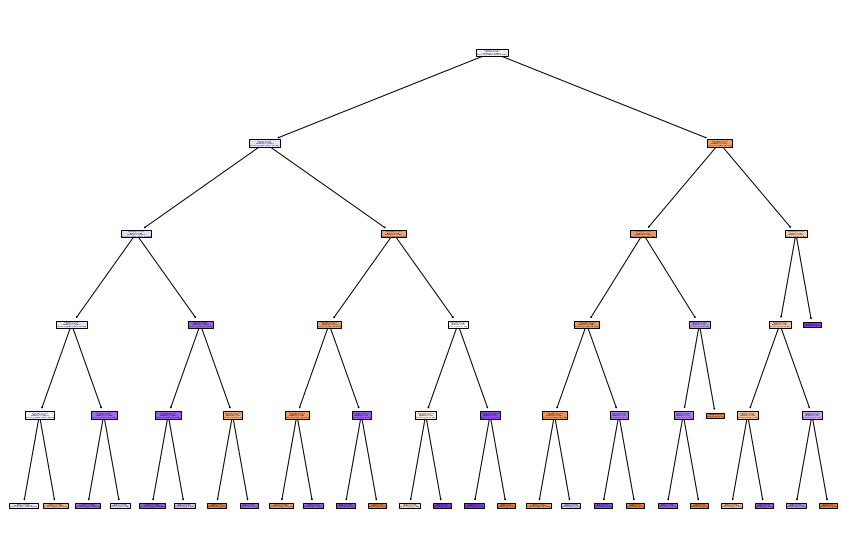

In [50]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [51]:
# apply the model on unseen testing data
dt_preds = decision_tree_classification.predict(x_test)
from sklearn import metrics
print("Accuracy of Decision Tree Classifier:", metrics.accuracy_score(y_test, dt_preds))

Accuracy of Decision Tree Classifier: 0.5152251376741173


In [52]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_dt = classification_report(y_test, dt_preds)
# print the performace measures
print(test_report_dt)

              precision    recall  f1-score   support

    Negative       0.76      0.27      0.39      4577
     Neutral       0.00      0.00      0.00      2292
    Positive       0.48      0.94      0.63      5479

    accuracy                           0.52     12348
   macro avg       0.41      0.40      0.34     12348
weighted avg       0.49      0.52      0.43     12348



In [53]:
#2. Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
Random_Forest_Classifier=RandomForestClassifier()
# fit the model using fit() on train data
Random_Forest = Random_Forest_Classifier.fit(x_tain,y_train)

In [56]:
# apply the model on unseen testing data
Rf_preds = Random_Forest_Classifier.predict(x_test)
from sklearn import metrics
print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, Rf_preds))

Accuracy of Random Forest Classifier: 0.7561548428895367


In [57]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_rf = classification_report(y_test, Rf_preds)
# print the performace measures
print(test_report_rf)

              precision    recall  f1-score   support

    Negative       0.76      0.74      0.75      4577
     Neutral       0.68      0.71      0.70      2292
    Positive       0.79      0.79      0.79      5479

    accuracy                           0.76     12348
   macro avg       0.74      0.75      0.74     12348
weighted avg       0.76      0.76      0.76     12348



In [58]:
#3. K Nearest Neighbour Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# define the K nearest neighbours model
KNeighbors_classifier = KNeighborsClassifier()

# train our K nearest neighbours model with the x and y training sets
KNeighbors=KNeighbors_classifier.fit(x_tain,y_train)

In [61]:
# apply the model on unseen testing data
kn_preds = KNeighbors.predict(x_test)
from sklearn import metrics
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))

Accuracy of KNeighbors Classifier: 0.3592484612892776


In [62]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_kn = classification_report(y_test, kn_preds)
# print the performace measures
print(test_report_kn)

              precision    recall  f1-score   support

    Negative       0.63      0.31      0.41      4577
     Neutral       0.23      0.89      0.37      2292
    Positive       0.79      0.18      0.29      5479

    accuracy                           0.36     12348
   macro avg       0.55      0.46      0.36     12348
weighted avg       0.63      0.36      0.35     12348



In [63]:
#4. Gaussian Naive Bayes Classifier

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
AdaBoost=ada_model.fit(x_tain,y_train)

In [66]:
# apply the model on unseen testing data
Ab_preds = AdaBoost.predict(x_test)
from sklearn import metrics
print("Accuracy of AdaBoost Classifier:", metrics.accuracy_score(y_test, Ab_preds))

Accuracy of AdaBoost Classifier: 0.5942662779397473


In [67]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_Ab = classification_report(y_test, Ab_preds)
# print the performace measures
print(test_report_Ab)

              precision    recall  f1-score   support

    Negative       0.68      0.58      0.62      4577
     Neutral       0.36      0.76      0.49      2292
    Positive       0.81      0.54      0.65      5479

    accuracy                           0.59     12348
   macro avg       0.62      0.63      0.59     12348
weighted avg       0.68      0.59      0.61     12348



In [68]:
#------------------------------------------------END-----------------------------------------------------------------#